In [3]:
import sys
import os

# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [18]:
import yfinance

In [20]:
print(yfinance.__version__)

0.2.58


In [6]:
from strategies.ANN_returns import ANNReturnStrategy
from strategies.ANN_prices import ANNPriceStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
data_handler = DataHandler(ticker='MSFT', start_date='2020-01-01', end_date='2024-01-01')
data = data_handler.fetch_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


### Technicals in a simple NN to do a single-period prediction 

Chapter 2: Calculation of technical indicators. Focus on S&P 500 stocks. Use technicals in a simple NN to do single-period prediction. Examine price prediction versus return prediction.

C:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


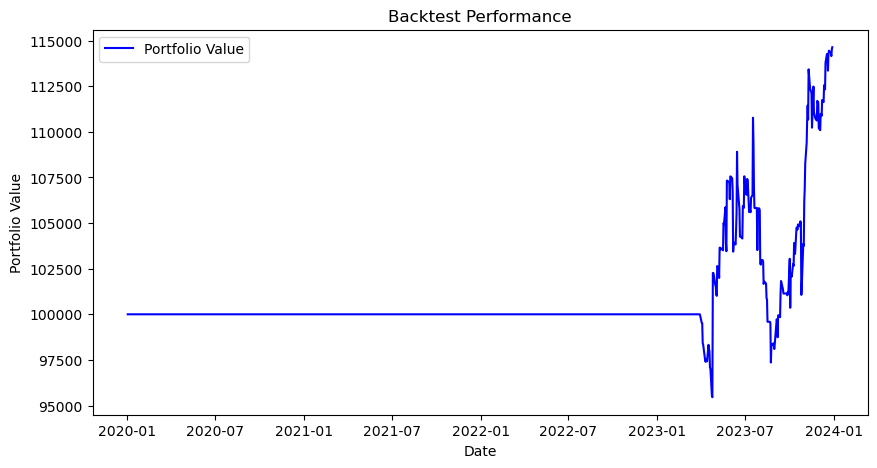

{'Final Value': 114636.99169165098, 'Return': 0.1463699169165098, 'Sharpe Ratio': 0.4709063470849658, 'Max Drawdown': -0.12111005013696308}


In [10]:
# Prices
price_strategy = ANNPriceStrategy()
backtest_prices = Backtest(data, price_strategy)
results_prices = backtest_prices.run()
print(results_prices)

C:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


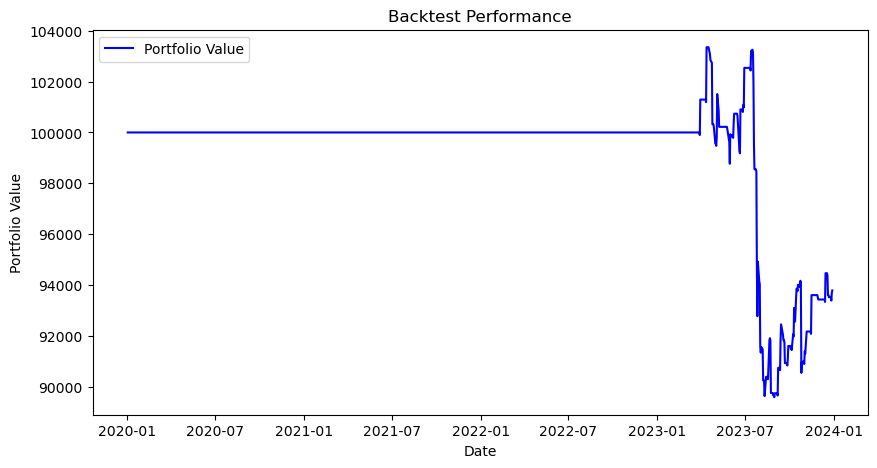

{'Final Value': 93790.25207656913, 'Return': -0.06209747923430875, 'Sharpe Ratio': -0.28390007015025326, 'Max Drawdown': -0.1331262594228323}


In [12]:
# Returns
returns_strategy = ANNReturnStrategy()
backtest_returns = Backtest(data, returns_strategy)
results_returns = backtest_returns.run()
print(results_returns)

#### Price prediction vs Return prediction

C:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


C:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


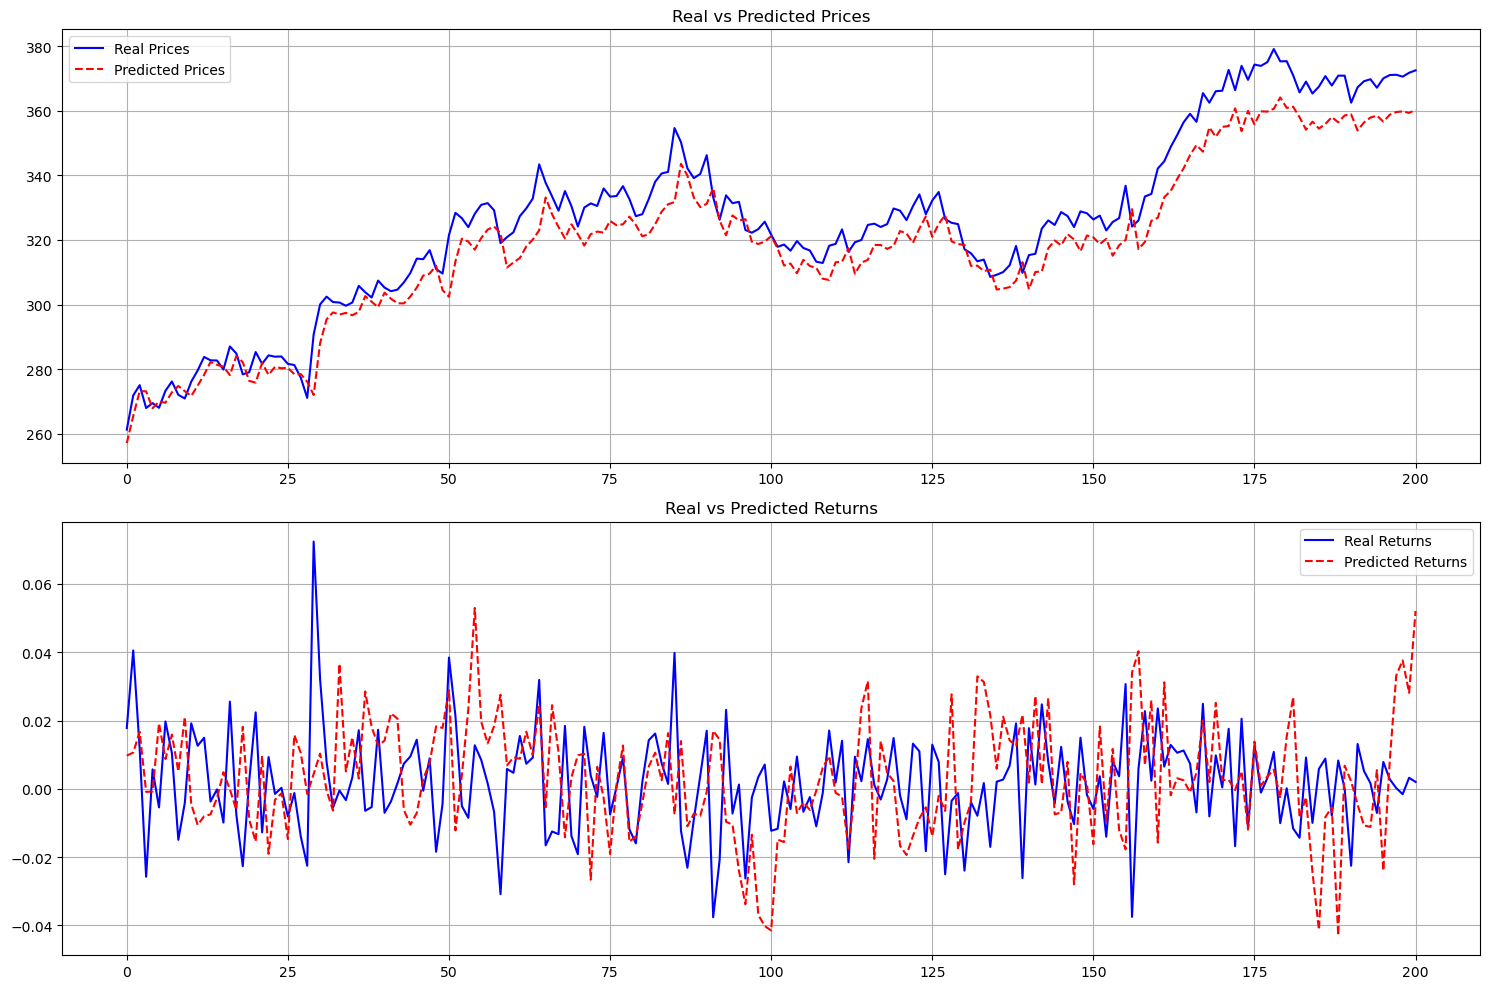


Price Prediction:
MSE: 84.38
R²: 0.89

Returns Prediction:
MSE: 0.000500
R²: -1.30


In [14]:
# 1. Price Strategy
price_strategy.generate_signals(data)  # Train the model

# Get price predictions
test_size = int(len(data) * 0.2)
real_prices = data['Close'].iloc[-test_size:].values
predicted_prices = price_strategy.scaler_y.inverse_transform(
    price_strategy.model.predict(price_strategy.scaler_X.transform(
        price_strategy.compute_indicators(data)[['SMA20', 'SMA50', 'Price_SMA20', 'RSI', 'MACD',
                                               'BB_upper', 'BB_lower', 'Price_BB_up']].iloc[-test_size:]
    ))
)

# 2. Returns Strategy
returns_strategy.generate_signals(data)  # Train the model

# Get returns predictions
real_returns = data['Close'].pct_change().iloc[-test_size:].values
predicted_returns = returns_strategy.model.predict(
    returns_strategy.scaler.transform(
        returns_strategy.compute_indicators(data)[['RSI', 'RSI_Change', 'MACD', 'SMA_cross', 'BB_width']].iloc[-test_size:]
    )
).flatten()

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Prices
ax1.plot(real_prices, label='Real Prices', color='blue')
ax1.plot(predicted_prices, label='Predicted Prices', color='red', linestyle='--')
ax1.set_title('Real vs Predicted Prices')
ax1.legend()
ax1.grid(True)

# Returns
ax2.plot(real_returns, label='Real Returns', color='blue')
ax2.plot(predicted_returns, label='Predicted Returns', color='red', linestyle='--')
ax2.set_title('Real vs Predicted Returns')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Error measures
print("\nPrice Prediction:")
print(f"MSE: {mean_squared_error(real_prices, predicted_prices):.2f}")
print(f"R²: {r2_score(real_prices, predicted_prices):.2f}")

print("\nReturns Prediction:")
print(f"MSE: {mean_squared_error(real_returns, predicted_returns):.6f}")
print(f"R²: {r2_score(real_returns, predicted_returns):.2f}")